In [2]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation

In [3]:
def plot_pareto_front(pareto_front, obtained_results, algorithm_name=str, problem_name=str):
    fig, axs = plt.subplots(1, 1)
    axs.set_ylim(-0.25, 1.25)
    axs.scatter(pareto_front[:, 0], pareto_front[:, 1], label= problem_name + ' Pareto')
    axs.scatter(obtained_results[:, 0], obtained_results[:, 1], label= algorithm_name + ' Obtained Pareto')
    plt.legend()
    plt.show()

In [4]:
def plot_pareto_front_3d(pareto_front, obtained_results, algorithm_name=str, problem_name=str):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=pareto_front[:, 0], y=pareto_front[:, 1], z=[0]*pareto_front.shape[0], mode='markers', name=problem_name + ' Pareto'))
    fig.add_trace(go.Scatter3d(x=obtained_results[:, 0], y=obtained_results[:, 1], z=[0]*obtained_results.shape[0], mode='markers', name=algorithm_name + ' Obtained Pareto'))

    fig.show()

In [34]:
def plot_multiple_pareto_fronts(fronts_dict, title="Pareto Fronts Comparison", cmap='Dark2'):

    cmap = plt.get_cmap(cmap)
    
    plt.figure(figsize=(10, 6))
    
    n_fronts = len(fronts_dict)
    colors = [cmap(i / (n_fronts - 1) if n_fronts > 1 else 0) for i in range(n_fronts)]
    
    # Define a list of interesting markers
    markers = ['*',    # star
              'o',     # circle
              '^',     # triangle up
              's',     # square
              'D',     # diamond
              'v',     # triangle down
              'p',     # pentagon
              'h',     # hexagon
              '8',     # octagon
              'P']     # plus (filled)
    
    # Plot each front with a different color and marker
    for i, (front_name, points) in enumerate(fronts_dict.items()):
        marker_idx = i % len(markers)  # Cycle through markers if more fronts than markers
        plt.scatter(points[:, 0], 
                   points[:, 1],
                   c=[colors[i]], 
                   marker=markers[marker_idx],
                   s=50,  # Increased marker size for better visibility
                   label=front_name,
                   alpha=0.7)
    
    plt.title(title)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    plt.show()

### zdt1

In [33]:
problem = get_problem("zdt1")
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT1')
# plot(problem.evaluate(results["best"]))


Generation       50 | Population Elite Points:      381 | Zitlerd: 0.8753 | Spa: 0.0212 | Hrs: 0.8627 | Gdplus: 0.4786 | Igdplus: 0.4555 | Hv: 0.1399


KeyboardInterrupt: 

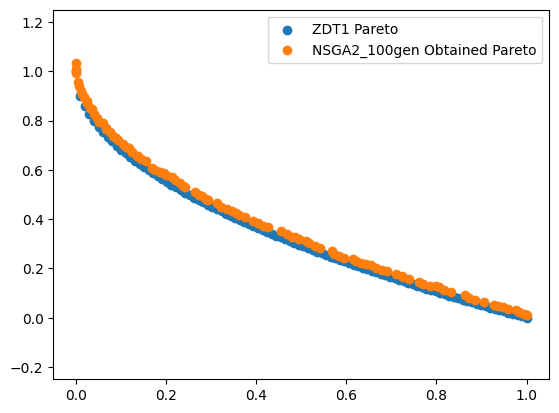

In [ ]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT1')

In [9]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT1')

### zdt3

Generation       50 | Population Elite Points:      511 | Best Fit: 1.0943 | Mean Fit: 0.0127
Generation      100 | Population Elite Points:      984 | Best Fit: 1.0488 | Mean Fit: 0.0064
Generation      150 | Population Elite Points:     1468 | Best Fit: 1.0252 | Mean Fit: 0.0042
Generation      200 | Population Elite Points:     1935 | Best Fit: 1.0272 | Mean Fit: 0.0032


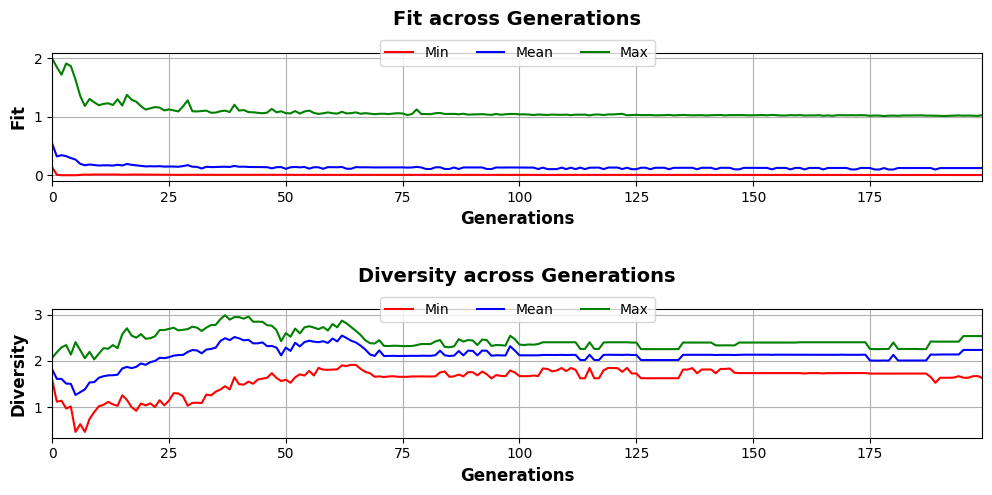

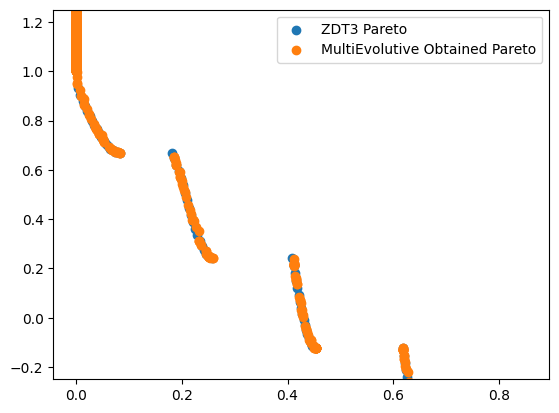

In [10]:
problem = get_problem("zdt3")
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT3')


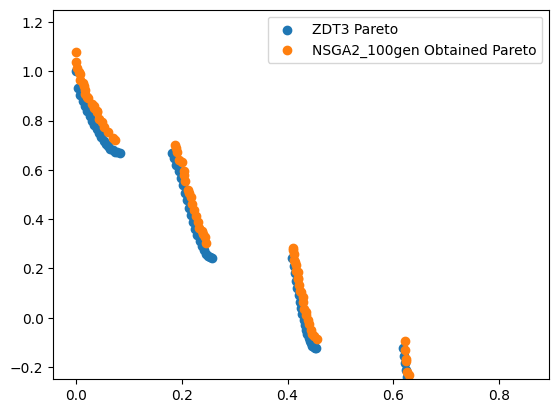

In [ ]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT3')

In [12]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT3')

### mw7

In [13]:
def mw7(x):
    g = 1 + 9 * np.sum(x[1:]) / (len(x) - 1)
    f1 = x[0]
    f2 = g * (1 - (f1 / g)**0.5)
    c1 = np.sum(x) - 1.5
    c2 = 0.5 - np.sum(x[:-1])
    return [f1, f2], [c1, c2]

In [14]:
def penalized_mw7(x):
    """
    Wrapper function for MW7 that incorporates constraints using penalty method.
    Returns modified fitness values with penalties for constraint violations.
    """
    # Get original objectives and constraints
    [f1, f2], [c1, c2] = mw7(x)
    
    # Calculate constraint violations
    # c1: sum(x) - 1.5 <= 0
    # c2: 0.5 - sum(x[:-1]) <= 0

    scaled_c1 = c1 / 1.5  # Normalize c1 by its max value
    scaled_c2 = c2 / 0.5  # Normalize c2 by its max value

    violation1 = max(0, scaled_c1) # Only penalize if > 0
    violation2 = max(0, scaled_c2) # Only penalize if > 0
    
    # Penalty coefficient (you may need to tune this)
    penalty_coef = 10 * np.max([abs(f1), abs(f2)])
    penalty = penalty_coef * (violation1 + violation2)

    # Add penalties to objectives
    penalized_f1 = f1 + penalty
    penalized_f2 = f2 + penalty
    
    return np.array([penalized_f1, penalized_f2])

Generation       50 | Population Elite Points:       41 | Best Fit: 0.2102 | Mean Fit: 0.0954
Generation      100 | Population Elite Points:      138 | Best Fit: 0.0309 | Mean Fit: 0.0231
Generation      150 | Population Elite Points:      301 | Best Fit: 0.0103 | Mean Fit: 0.0101
Generation      200 | Population Elite Points:      610 | Best Fit: 0.0050 | Mean Fit: 0.0049
Generation      250 | Population Elite Points:      947 | Best Fit: 0.0032 | Mean Fit: 0.0031
Generation      300 | Population Elite Points:     1233 | Best Fit: 0.0024 | Mean Fit: 0.0024
Generation      350 | Population Elite Points:     1568 | Best Fit: 0.0019 | Mean Fit: 0.0019
Generation      400 | Population Elite Points:     1920 | Best Fit: 0.0015 | Mean Fit: 0.0015
Generation      450 | Population Elite Points:     2203 | Best Fit: 0.0013 | Mean Fit: 0.0013
Generation      500 | Population Elite Points:     2574 | Best Fit: 0.0011 | Mean Fit: 0.0011


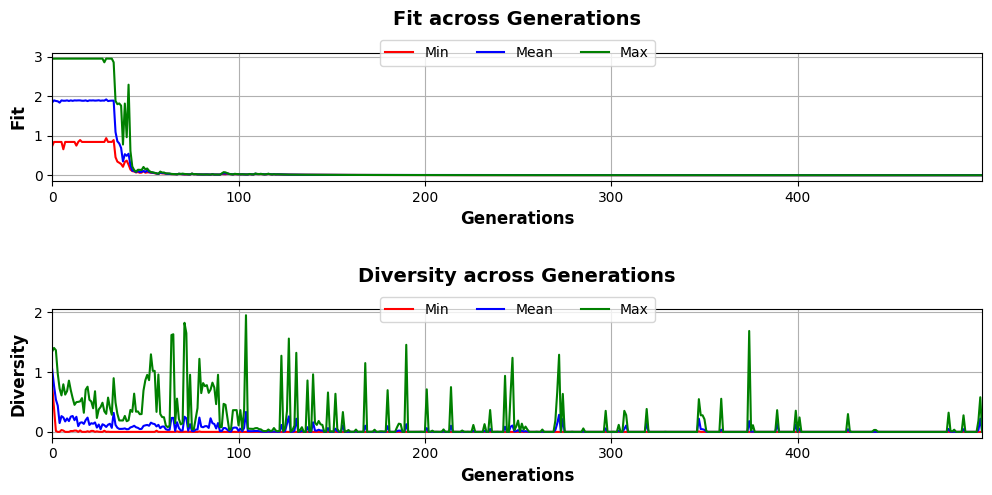

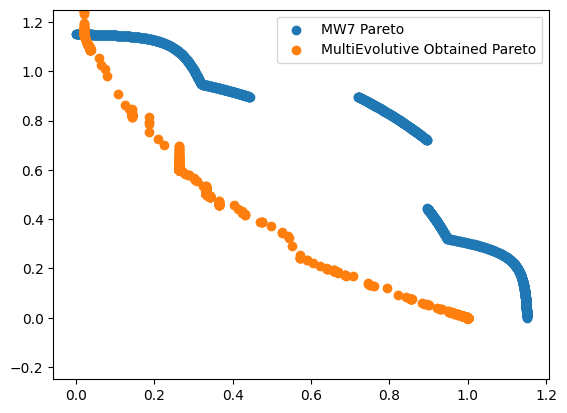

In [20]:
problem = get_problem("mw7")
evolutive = RealMultiEvolutive(
    n_individuals=20,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='range',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.05,
    elitism=True,
    alpha=0.3,
    T_selection=8
)

results = evolutive.evolve(fit=penalized_mw7, n_generations=500, trace=50, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
obtained_results = np.array([mw7(p)[0] for p in results["best"]])  # Use only objectives, not constraints

plot_pareto_front(pareto_front, obtained_results, 'MultiEvolutive', 'MW7')

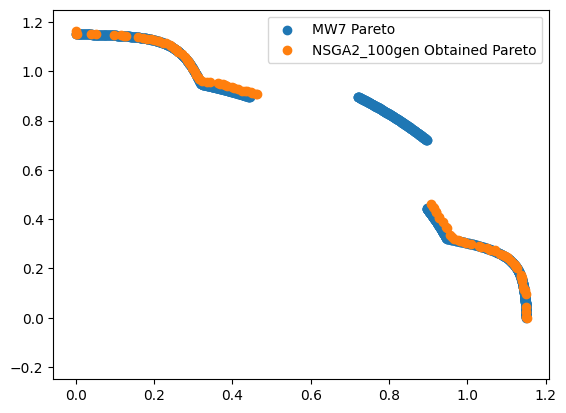

In [21]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'MW7')

In [22]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'MW7')

### mw14

In [23]:
problem = get_problem("mw14", n_var=30, n_obj=3)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1.5],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'MW14')


c:\Users\aleja\Desktop\MAADM\BIO\bioinspired-evo\src\multi_evolutive\evolutive.py:74: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'MW14')

### TSP

In [54]:
class TSPProblem(Problem):
    def __init__(self, n_cities, seed=50):
        # Define the number of variables (cities) and objectives (time and distance)
        super().__init__(n_var=n_cities, n_obj=2, n_constr=0, xl=0, xu=1)
        
        # Initialize the random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)
        
        # Generate random distances and times between cities
        self.distances = np.random.uniform(0, 100, size=(n_cities, n_cities))
        self.distances = (self.distances + self.distances.T) / 2
        self.times = np.random.uniform(0, 300, size=(n_cities, n_cities))
        random.seed(None)
        
        # Ensure the diagonal is zero (distance/time from a city to itself is zero)
        np.fill_diagonal(self.distances, 0)
        np.fill_diagonal(self.times, 0)

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the total distance and time for each solution in x
        distances = []
        times = []
        
        for route in x:
            perm = np.argsort(route)
            total_distance = 0
            total_time = 0
            
            for i in range(len(perm) - 1):
                total_distance += self.distances[perm[i], perm[i+1]]
                total_time += self.times[perm[i], perm[i+1]]
            
            # Add distance and time from last city back to the first city
            total_distance += self.distances[perm[-1], perm[0]]
            total_time += self.times[perm[-1], perm[0]]
            
            distances.append(total_distance)
            times.append(total_time)
        
        out["F"] = np.column_stack([distances, times])

In [55]:
problem_tsp = TSPProblem(100)

In [56]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem_tsp,
               algorithm,
               ('n_gen', 10),
               verbose=False)
res2 = minimize(problem_tsp,
               algorithm,
               ('n_gen', 1000),
               verbose=False)

results = {}

results["NSGA2_10gen"] = res.F
results["NSGA2_1000gen"] = res2.F

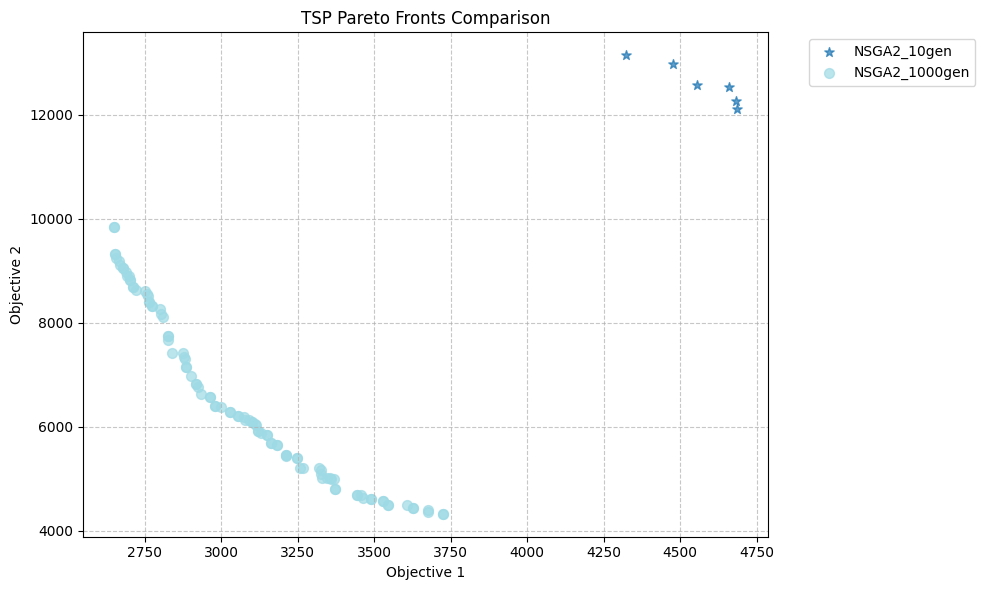

In [57]:
plot_multiple_pareto_fronts(results, title="TSP Pareto Fronts Comparison", cmap='tab20')

Generation       50 | Population Elite Points:       35 | Best Fit: 1.7897 | Mean Fit: 0.2052
Generation      100 | Population Elite Points:       34 | Best Fit: 1.8745 | Mean Fit: 0.2204
Generation      150 | Population Elite Points:       40 | Best Fit: 1.7472 | Mean Fit: 0.2150
Generation      200 | Population Elite Points:       35 | Best Fit: 1.9423 | Mean Fit: 0.2128


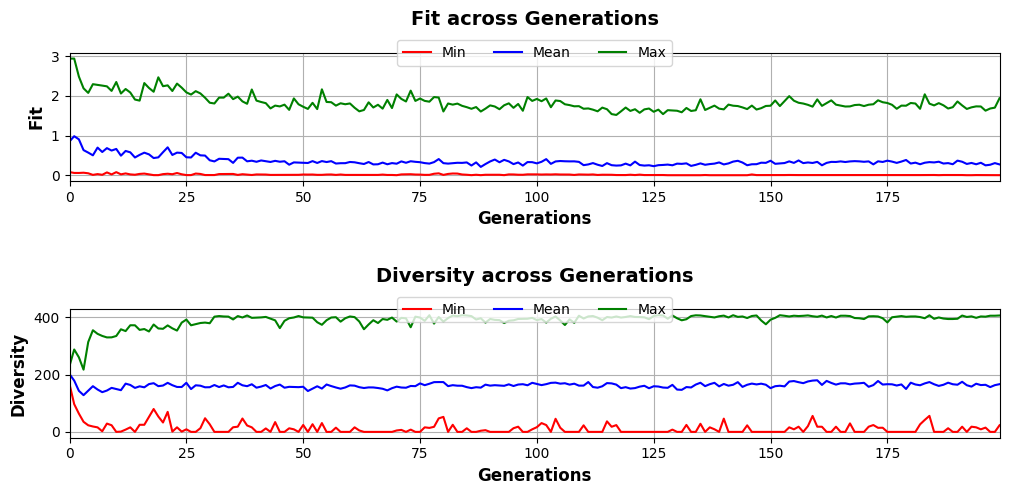

In [58]:
from src.multi_evolutive import PermutationMultiEvolutive
import matplotlib.pyplot as plt

evolutive = PermutationMultiEvolutive(
    alphabet=range(100),
    n_individuals=50,
    cromolength=100,
    mutation=["to-opt", "insert-gene", "swap-gene"],
    crossover= ["uniform", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'],
	T_selection=20,
	p_crossover=0.7,
	average_mutation_rate=1.25,
    maximize=[False, False],
    selection_pool_size=1.5,
	elitism=True
)

results = evolutive.evolve(fit=problem_tsp.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


Generation       50 | Population Elite Points:       27 | Best Fit: 2.0467 | Mean Fit: 0.3253
Generation      100 | Population Elite Points:       34 | Best Fit: 1.8523 | Mean Fit: 0.2614
Generation      150 | Population Elite Points:       42 | Best Fit: 1.6356 | Mean Fit: 0.1562
Generation      200 | Population Elite Points:       76 | Best Fit: 1.4074 | Mean Fit: 0.0749


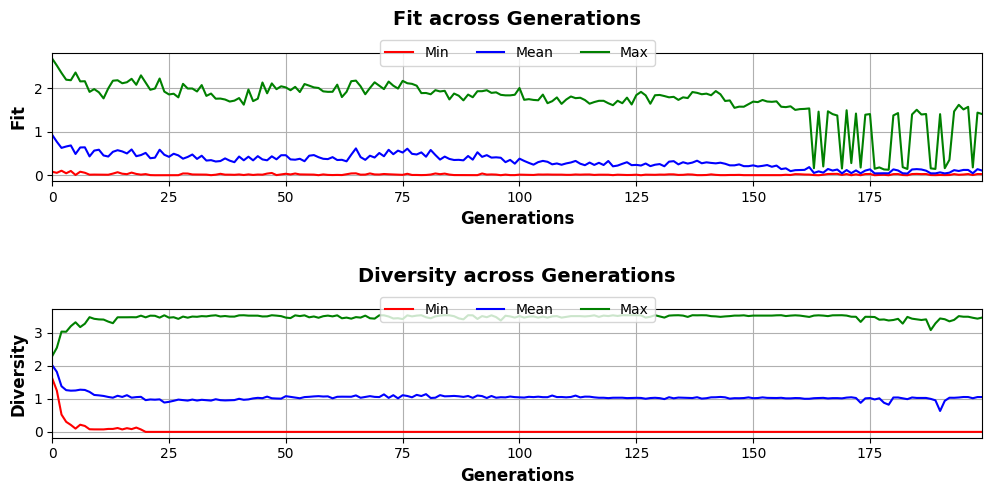

In [ ]:
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=100,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'], # , ('best', 4)],
    selection_pool_size=1.,
    average_mutation_rate=1.,
    mutation_eps=.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem_tsp.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()